# Desafío - Análisis de ventas y rendimiento de las tiendas

El objetivo de este desafío es ayudar al señor Juan a decidir qué tienda debe vender para invertir en un nuevo negocio. Para ello, evaluaremos cuál de estas cuatro tiendas tiene un desempeño menor, permitiendo al señor Juan tomar la decisión de cuál de estas cuatro tiendas debe vender para invertir en un nuevo negocio.

Te han contratado para realizar este análisis. Tu jefe te ha pedido que hagas la evaluación basándose en estos cinco aspectos:

1. Facturación total de cada tienda, es decir, cuál tienda vende más. 
2. Cuáles son las categorías más populares de cada tienda, es decir, cuáles productos se venden más en cada tienda?
3. Cuál es el promedio de evaluación de cada uno de los clientes?
4. Cuáles son los productos más y menos vendidos en cada tienda?
5. Cuál es el costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes?

Con estos datos, ayudara al señor Juan a tomar una decisión fundamental y estratégica.

### Importación de la base de datos

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn

In [230]:
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib.ticker as ticker;
import numpy as np;
import seaborn as sns;

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Estructura de datos:
El conjunto de datos incluye la siguiente información:

`Producto y Categoría`: Artículos vendidos y sus calificaciones.

`Precio y Envío`: Valores de venta y costos asociados.

`Fecha y ubicación de compra`: Información temporal y geográfica.

`Evaluación de compra`: Comentarios de clientes.

`Tipo de Pago y Cuotas`: Métodos utilizados por los clientes.

`Coordenadas Geográficas`: Ubicación de las transacciones.

## 1. Análisis de facturación:

En este primer análisis, debemos calcular el ingreso total de cada tienda. Sumando los valores de la columna `Precio` de cada conjunto de datos de la tienda para estimar los ingresos.

- Ingresos totales por tienda:

In [226]:
stores = [tienda1, tienda2, tienda3, tienda4];
sum_stores = [];

for store in stores:
    sum_stores.append(store['Precio'].sum());

print(f"Ingreso Total Tienda 1: {sum_stores[0]:,.2f}")
print(f"Ingreso Total Tienda 2: {sum_stores[1]:,.2f}")
print(f"Ingreso Total Tienda 3: {sum_stores[2]:,.2f}")
print(f"Ingreso Total Tienda 4: {sum_stores[3]:,.2f}")

Ingreso Total Tienda 1: 1,150,880,400.00
Ingreso Total Tienda 2: 1,116,343,500.00
Ingreso Total Tienda 3: 1,098,019,600.00
Ingreso Total Tienda 4: 1,038,375,700.00


- Promedio de los ingresos totales de las 4 tiendas:

In [196]:
promedio_ingresos = np.mean(sum_stores);
print(f"Promedio de Ingresos Totales: {promedio_ingresos:,.2f}")

Promedio de Ingresos Totales: 1,100,904,800.00


- Gráfica de los ingresos totales de las tiendas respecto a a su promedio:

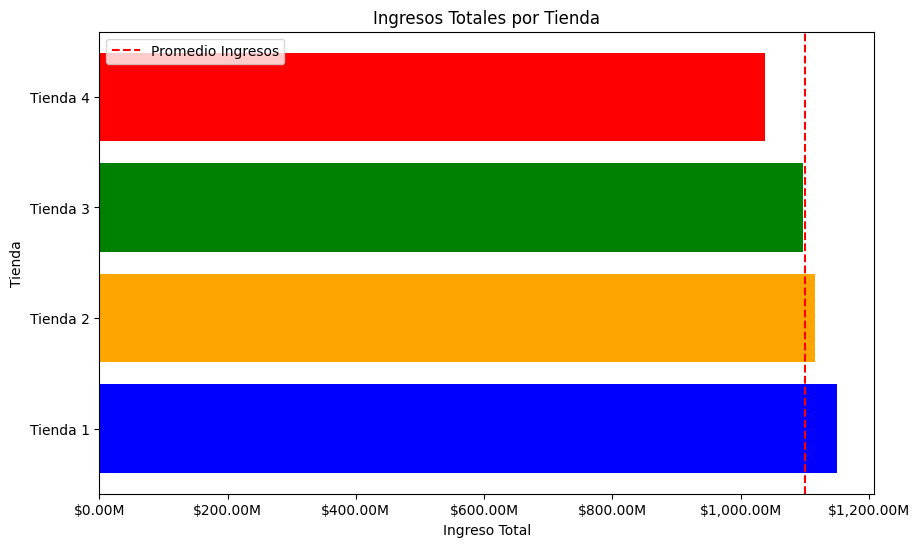

In [28]:
plt.figure(figsize=(10, 6));
plt.axvline(promedio_ingresos, color='red', linestyle='--', label='Promedio Ingresos');
plt.legend();
plt.title('Ingresos Totales por Tienda');
plt.ylabel('Tienda');
plt.xlabel('Ingreso Total');
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6));
plt.gca().xaxis.set_major_formatter(escalax);
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores, color=['blue', 'orange', 'green', 'red']);


### En conclusión:

In [30]:
print(f"La tienda con mayor ingreso es la Tienda {sum_stores.index(max(sum_stores)) + 1} con un ingreso total de ${max(sum_stores):,.2f}.");
print(f"Y la tienda con menor ingreso es la Tienda {sum_stores.index(min(sum_stores)) + 1} con un ingreso total de ${min(sum_stores):,.2f}.");

La tienda con mayor ingreso es la Tienda 1 con un ingreso total de $1,150,880,400.00.
Y la tienda con menor ingreso es la Tienda 4 con un ingreso total de $1,038,375,700.00.


## 2. Ventas por categoría:

En este punto debemos calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

- Lista de las 4 tiendas respecto a tipo de producto, cantidad de producto y total del producto vendido:

In [223]:
def calcular_categorias(store,categoria):
    df = pd.DataFrame(store);
    return df.groupby([categoria]).agg(
    cantidad_productos=(categoria, 'size'),
    cantidad_vendida=('Precio', 'sum'),
    );

resultados_store = {};
for i, store in enumerate(stores):
    resultados_store[f'Tienda {i+1}'] = calcular_categorias(store, 'Categoría del Producto');

for nombre_store, categorias in resultados_store.items():
    print(f"\n{nombre_store}:");
    categorias = categorias.sort_values(by='cantidad_vendida', ascending=False)
    categorias['cantidad_vendida'] = categorias['cantidad_vendida'].map('${:,.2f}'.format)
    print(categorias)
    


Tienda 1:
                         cantidad_productos cantidad_vendida
Categoría del Producto                                      
Electrónicos                            448  $429,493,500.00
Electrodomésticos                       312  $363,685,200.00
Muebles                                 465  $187,633,700.00
Instrumentos musicales                  182   $91,299,000.00
Deportes y diversión                    284   $39,290,000.00
Juguetes                                324   $17,995,700.00
Artículos para el hogar                 171   $12,698,400.00
Libros                                  173    $8,784,900.00

Tienda 2:
                         cantidad_productos cantidad_vendida
Categoría del Producto                                      
Electrónicos                            422  $410,831,100.00
Electrodomésticos                       305  $348,567,800.00
Muebles                                 442  $176,426,300.00
Instrumentos musicales                  224  $104,990,300.00
De

- Convertimos la información obtenida en un dataframe para mayor eficiencia.

In [232]:
def calcular_categorias(store,categoria):
    df = pd.DataFrame(store);
    return df.groupby([categoria]).agg(
    cantidad_productos=(categoria, 'size'),
    cantidad_vendida=('Precio', 'sum'),
    );

resultados_store = {};

for i, store in enumerate(stores):
    categorias = calcular_categorias(store, 'Categoría del Producto');
    categorias['Tienda'] = f'Tienda {i+1}';
    categorias = categorias.reset_index();
    resultados_store[f'Tienda {i+1}'] = categorias;

df1 = pd.concat(resultados_store.values(), ignore_index=True);

df1['cantidad_vendida'] = df1['cantidad_vendida'].map('{:,.2f}'.format)
print(df1)

     Categoría del Producto  cantidad_productos cantidad_vendida    Tienda
0   Artículos para el hogar                 171    12,698,400.00  Tienda 1
1      Deportes y diversión                 284    39,290,000.00  Tienda 1
2         Electrodomésticos                 312   363,685,200.00  Tienda 1
3              Electrónicos                 448   429,493,500.00  Tienda 1
4    Instrumentos musicales                 182    91,299,000.00  Tienda 1
5                  Juguetes                 324    17,995,700.00  Tienda 1
6                    Libros                 173     8,784,900.00  Tienda 1
7                   Muebles                 465   187,633,700.00  Tienda 1
8   Artículos para el hogar                 181    14,746,900.00  Tienda 2
9      Deportes y diversión                 275    34,744,500.00  Tienda 2
10        Electrodomésticos                 305   348,567,800.00  Tienda 2
11             Electrónicos                 422   410,831,100.00  Tienda 2
12   Instrumentos musical

- Gráfica de Cantidad de productos vendidos por Categoría y Tienda:

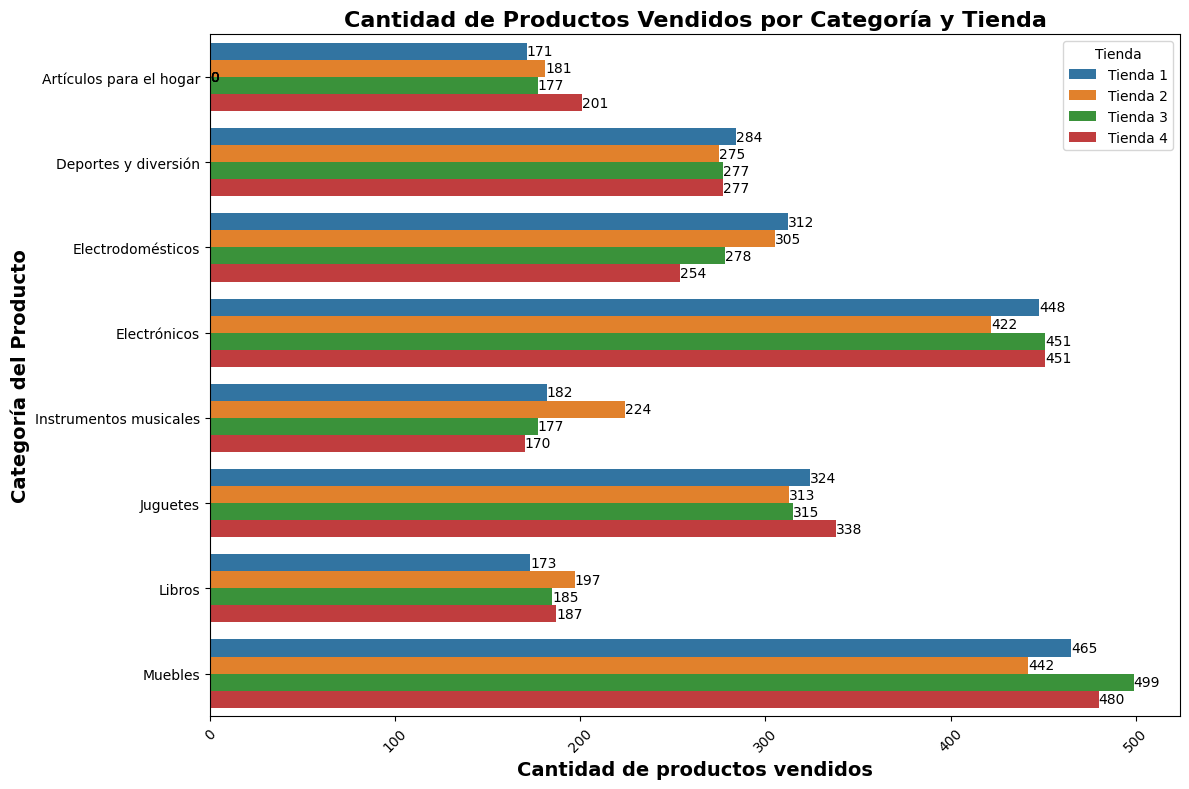

In [ ]:
df1['cantidad_productos'] = df1['cantidad_productos'].astype(float);

plt.figure(figsize=(12, 8));
ax = sns.barplot(
    data=df1,
    y='Categoría del Producto',
    x='cantidad_productos',
    hue='Tienda'
)

for barra in ax.patches:
    cantidad = barra.get_width();
    ax.text(cantidad, barra.get_y() + barra.get_height()/2, 
            f'{cantidad:,.0f}', va='center', ha='left', fontsize=10, color='black');

plt.title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=16, fontweight='bold');
plt.xlabel('Cantidad de productos vendidos', fontsize=14, fontweight='bold');
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

- Gráfica de Total de Producto Vendido respecto Categoría y tienda:

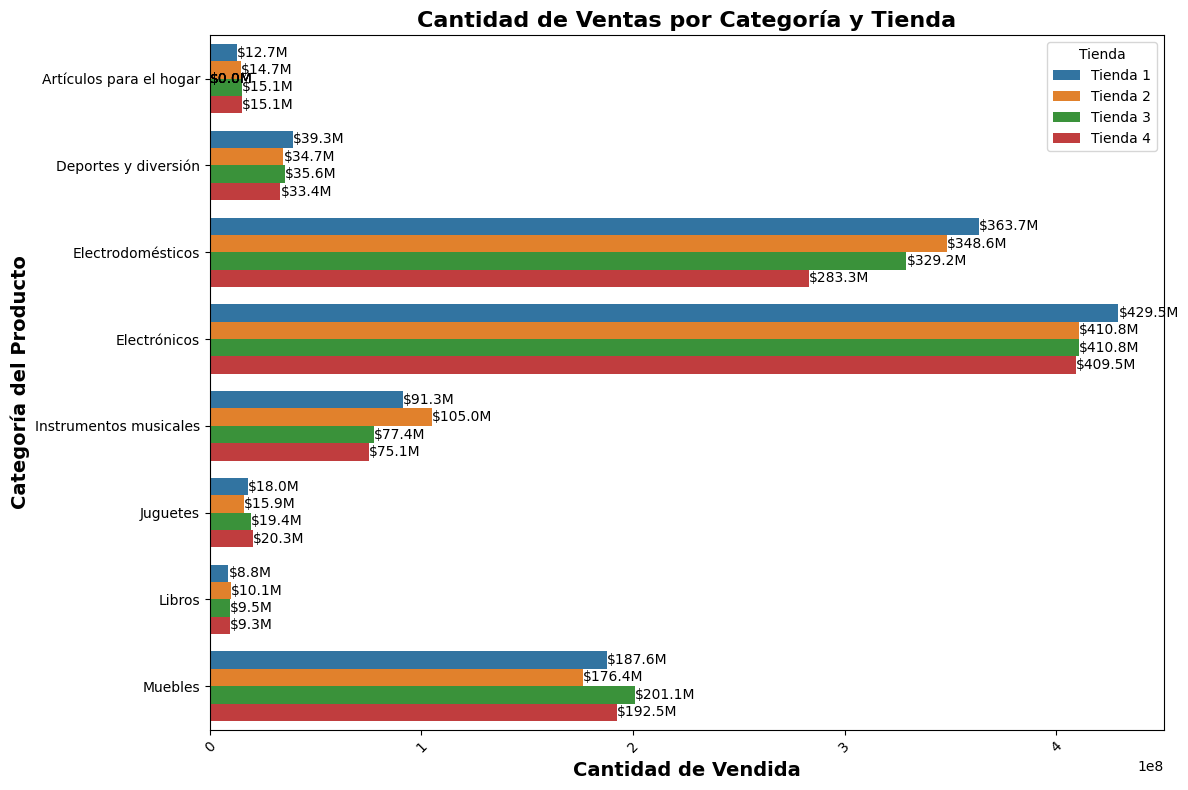

In [260]:
df1['cantidad_vendida'] = df1['cantidad_vendida'].astype(float);

plt.figure(figsize=(12, 8));
ax = sns.barplot(
    data=df1,
    y='Categoría del Producto',
    x='cantidad_vendida',
    hue='Tienda'
)

for barra in ax.patches:
    cantidad = barra.get_width();
    ax.text(cantidad, barra.get_y() + barra.get_height()/2, 
            f'${cantidad/1e6:,.1f}M', va='center', ha='left', fontsize=10, color='black');

plt.title('Cantidad de Ventas por Categoría y Tienda', fontsize=16, fontweight='bold');
plt.xlabel('Cantidad de Vendida', fontsize=14, fontweight='bold');
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

## 3. Calificación promedio de la tienda:

## 4. Productos más y menos vendidos:

## 5. Envío promedio por tienda: